<a href="https://colab.research.google.com/github/mhdhfzz/Pengembangan-Machine-Learning-Dicoding/blob/main/ML%20Model%20with%20Data%20Time%20Series/NLP_Model_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Membuat Model NLP dengan TensorFlow**
- Nama: Muhammad Hafiz
- Email: mhdhfz391@gmail.com
- Id Dicoding: mhdhfzz

## **Menyiapkan semua library yang dibutuhkan**

In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import nltk
import re
import string
import unicodedata

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Membaca dataset dan visualisasi data berdasarkan Theme**

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19FPrDU0nT0SpGBKlwHYCx88I5OeyU3YQ' -O CNN_Articels_clean.csv

--2023-12-15 23:25:06--  https://docs.google.com/uc?export=download&id=19FPrDU0nT0SpGBKlwHYCx88I5OeyU3YQ
Resolving docs.google.com (docs.google.com)... 173.194.74.113, 173.194.74.139, 173.194.74.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.74.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0dosd58513588vb5fpob68h84pkisrem/1702682700000/13799905316849870559/*/19FPrDU0nT0SpGBKlwHYCx88I5OeyU3YQ?e=download&uuid=8c546486-0e72-451c-826c-566284bfcef1 [following]
--2023-12-15 23:25:07--  https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0dosd58513588vb5fpob68h84pkisrem/1702682700000/13799905316849870559/*/19FPrDU0nT0SpGBKlwHYCx88I5OeyU3YQ?e=download&uuid=8c546486-0e72-451c-826c-566284bfcef1
Resolving doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.com)... 74.125.69.132, 2607:f8b0:4

In [ ]:
#import data ke variabel untuk dibaca
news_data = pd.read_csv('CNN_Articels_clean.csv')

#cek 5 data teratas
news_data.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...


In [ ]:
#hapus columns yang tidak digunakan
del_col = ['Index','Author','Date published','Section','Url','Keywords','Second headline','Article text']
news_data = news_data.drop(columns=del_col)
news_data

,Category,Headline,Description
0,news,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...
1,news,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...
2,news,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou..."
3,business,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg..."
4,business,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...
...,...,...,...
4071,sport,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...
4072,sport,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...
4073,sport,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...
4074,news,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...


In [ ]:
#total data
news_data.shape

(4076, 3)

In [ ]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     4076 non-null   object
 1   Headline     4076 non-null   object
 2   Description  4076 non-null   object
dtypes: object(3)
memory usage: 95.7+ KB


In [ ]:
#Category
news_data.Category.value_counts()

sport            2176
news             1611
business          104
politics           75
entertainment      58
health             52
Name: Category, dtype: int64

In [ ]:
# Cek apakah ada nilai Null
news_data.isnull().sum()

Category       0
Headline       0
Description    0
dtype: int64

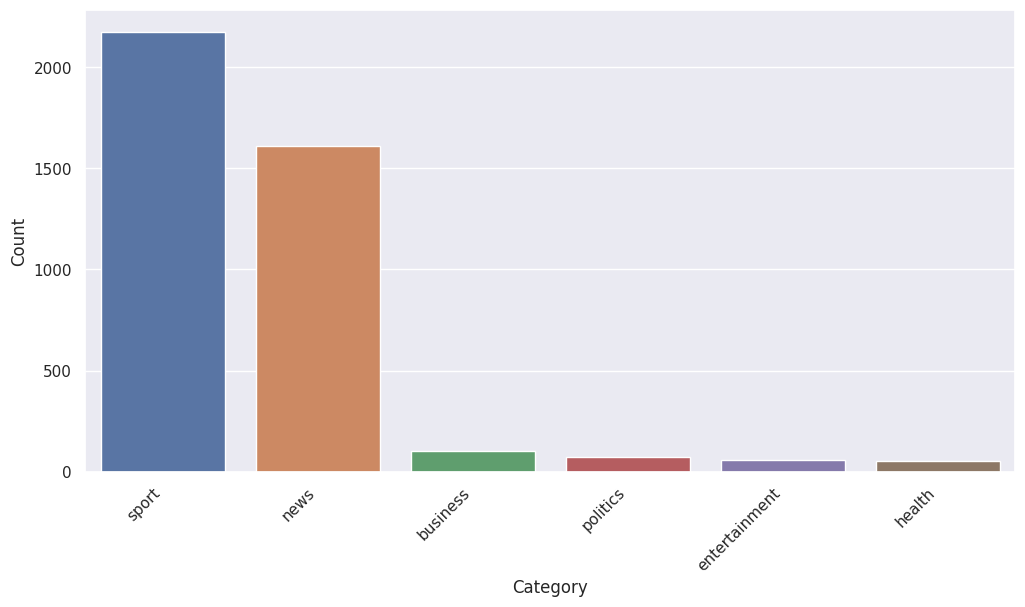

In [ ]:
#visualisasi data berdasarkan Category
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="Category", data=news_data, order=news_data['Category'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
#menggabungkan column Headline dan Description
news_data['Text'] = news_data['Headline'] + " " + news_data['Description']
news_data

,Category,Headline,Description,Text
0,news,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"There's a shortage of truckers, but TuSimple t..."
1,news,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,Bioservo's robotic 'Ironhand' could protect fa...
2,news,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...",This swarm of robots gets smarter the more it ...
3,business,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...",Russia is no longer an option for investors. T...
4,business,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,Russian energy investment ban part of new EU s...
...,...,...,...,...
4071,sport,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...,Australian Open: Australia's vaccine mandate i...
4072,sport,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...,Four golfers test positive ahead of South Afri...
4073,sport,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...,Peng Shuai: 'Unanimous conclusion' that tennis...
4074,news,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,"This company is ""zapping"" cow dung with lightn..."


## **Data Cleaning**

### **Menghapus Stopwords**

Stop words adalah kata umum (common words) yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stop words untuk bahasa Inggris diantaranya “of”, “i”, dll. Kata tersebut sudah ada dalah corpus

In [ ]:
stwd = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stwd.update(punctuation)

In [ ]:
# data cleaning
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#hapus square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#hapus URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)
#hapus stopwords dari text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stwd:
            final_text.append(i.strip())
    return " ".join(final_text)
#hapus noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
news_data['Text']=news_data['Text'].apply(denoise_text)

<ipython-input-12-1333d640e9da>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


### **Jumlah Word**

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(news_data.Text)
corpus[:10]

["There's",
 'shortage',
 'truckers,',
 'TuSimple',
 'thinks',
 'solution:',
 'driver',
 'needed',
 'CNN',
 'e-commerce']

In [ ]:
#jumlah kata yang sering ditemukan
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'CNN': 4111,
 'first': 476,
 'says': 417,
 'Covid-19': 405,
 '--': 405,
 'new': 332,
 'said': 328,
 'US': 315,
 'League': 300,
 'Tokyo': 293}

In [ ]:
def get_top_text_ngrams(corpus, n, g):
    cv = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_words = cv.transform(corpus)
    sum_words = bag_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

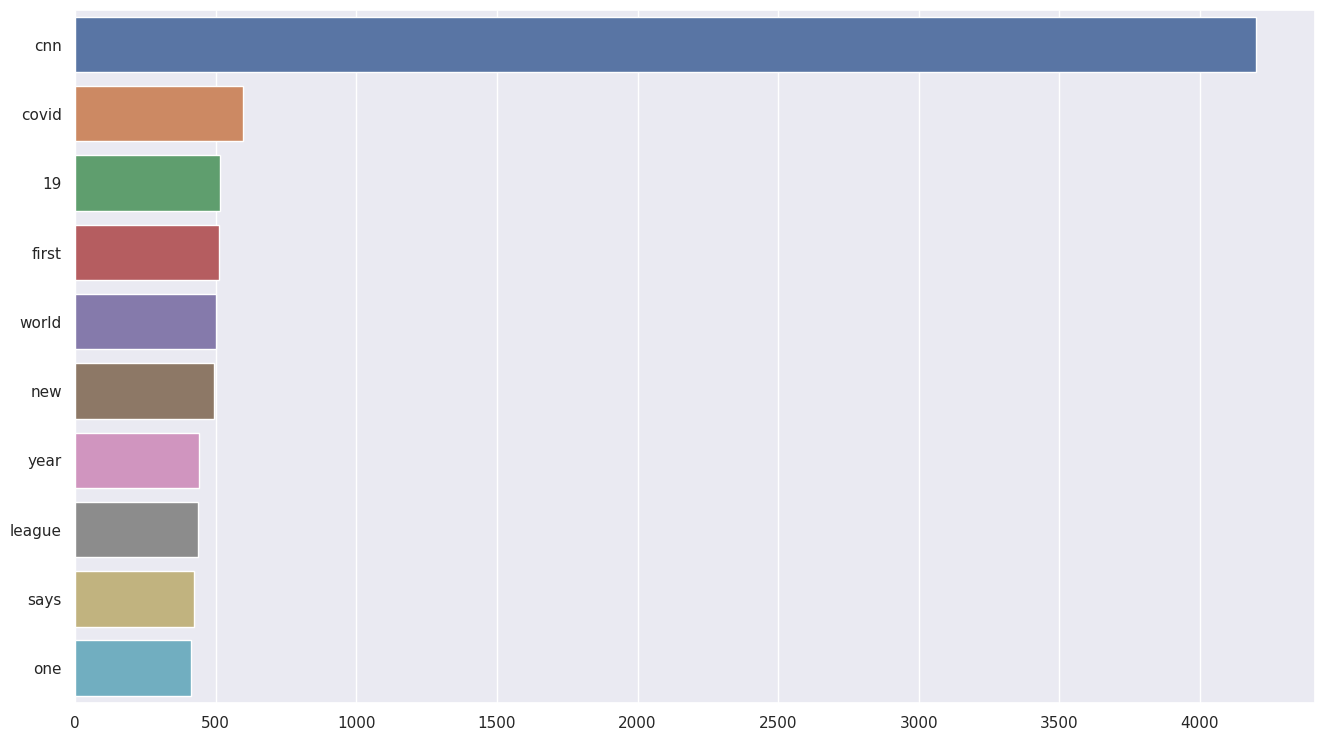

In [ ]:
plt.figure(figsize = (16,9))
most_common = get_top_text_ngrams(news_data.Text,10,1)
most_common = dict(most_common)
sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))

### **Encoding & Splitting Data**

In [ ]:
# data Category one-hot-encoding
Category = pd.get_dummies(news_data.Category)
new_cat = pd.concat([news_data, Category], axis=1)
new_cat = new_cat.drop(columns='Category')
new_cat.head(10)

,Headline,Description,Text,business,entertainment,health,news,politics,sport
0,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"There's shortage truckers, TuSimple thinks sol...",0,0,0,1,0,0
1,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,Bioservo's robotic 'Ironhand' could protect fa...,0,0,0,1,0,0
2,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...",swarm robots gets smarter works CNN Hong Kong ...,0,0,0,1,0,0
3,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...",Russia longer option investors. emerging marke...,1,0,0,0,0,0
4,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,Russian energy investment ban part new EU sanc...,1,0,0,0,0,0
5,Anti-war protester interrupts live Russian sta...,"A woman holding a sign reading ""NO WAR"" interr...",Anti-war protester interrupts live Russian sta...,1,0,0,0,0,0
6,Benjamin Hall: Fox News correspondent hospital...,"Fox News correspondent Benjamin Hall, who had ...",Benjamin Hall: Fox News correspondent hospital...,1,0,0,0,0,0
7,Russia could default on its debt within days -...,Russia has sent the clearest signal yet that i...,Russia could default debt within days CNN Russ...,1,0,0,0,0,0
8,Oil briefly tumbles below $100 a barrel. That'...,US oil prices briefly tumbled below $100 a bar...,Oil briefly tumbles $100 barrel. That's good n...,1,0,0,0,0,0
9,Russia may have found a buyer for its cheap oi...,India may take up a Russian offer to buy crude...,Russia may found buyer cheap oil: India CNN In...,1,0,0,0,0,0


In [ ]:
# change dataframe value to numpy array
news = new_cat['Text'].values
label = new_cat[['business', 'entertainment','health','news','politics','sport']].values

In [ ]:
# cek news
news

array(["There's shortage truckers, TuSimple thinks solution: driver needed CNN e-commerce boom exacerbated global truck driver shortage, could autonomous trucks help fix problem?",
       "Bioservo's robotic 'Ironhand' could protect factory workers injuries CNN Working factory mean task over, could lead chronic injury. battery-powered glove Swedish company Bioservo could help workers taking strain.",
       "swarm robots gets smarter works CNN Hong Kong warehouse, swarm autonomous robots works 24/7. They're working hard, they're working smart; operate, get better job.",
       ...,
       'Peng Shuai: \'Unanimous conclusion\' tennis star \'fine,\' says IOC member Dick Pound CNN Long-time International Olympic Committee (IOC) member Dick Pound said "unanimous conclusion" call Chinese tennis star Peng Shuai "fine."',
       'company "zapping" cow dung lightning trap climate-warming methane CNN Norwegian technology company found way stop livestock slurry releasing methane, greenhouse gas 

In [ ]:
#cek label
label

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

**Split dataset 20% test / validasi**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(news, label,test_size = 0.2,shuffle=True)

## **Tokenizer dan Pemodelan Sequential dengan Embedding dan LSTM**

In [ ]:
vocab_size = 5000
max_len = 100
trunc_type = "post"
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
pad_train = pad_sequences(sequences_train, maxlen=max_len, truncating=trunc_type)
pad_test = pad_sequences(sequences_test, maxlen=max_len, truncating=trunc_type)

print(pad_test.shape)

(816, 100)


In [ ]:
pad_train

array([[   0,    0,    0, ..., 4454,   77,  206],
       [   0,    0,    0, ...,   52,   81,  194],
       [   0,    0,    0, ...,   95,   12,   44],
       ...,
       [   0,    0,    0, ...,  644,   63, 2186],
       [   0,    0,    0, ..., 4095, 2610, 1043],
       [   0,    0,    0, ...,  326,  134, 1708]], dtype=int32)

In [ ]:
pad_test

array([[   0,    0,    0, ...,  334,    1,    1],
       [   0,    0,    0, ..., 1586,   16,   44],
       [   0,    0,    0, ..., 1509,    1,    1],
       ...,
       [   0,    0,    0, ...,    1,   12,   44],
       [   0,    0,    0, ...,   20,   12,   25],
       [   0,    0,    0, ...,   39,  494,   45]], dtype=int32)

In [ ]:
# model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 436102 (1.66 MB)
Trainable params: 436102 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.91):
      self.model.stop_training = True
      print("\n akurasi dari training set dan validation set telah terpenuhi > 91%!")
callbacks = myCallback()

num_epochs = 50
history = model.fit(pad_train, y_train, epochs=num_epochs,
                    validation_data=(pad_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
102/102 - 23s - loss: 1.1112 - accuracy: 0.4991 - val_loss: 0.9463 - val_accuracy: 0.5502 - 23s/epoch - 227ms/step
Epoch 2/50
102/102 - 4s - loss: 0.7508 - accuracy: 0.7328 - val_loss: 0.3867 - val_accuracy: 0.9032 - 4s/epoch - 41ms/step
Epoch 3/50
102/102 - 3s - loss: 0.2739 - accuracy: 0.9172 - val_loss: 0.3870 - val_accuracy: 0.8860 - 3s/epoch - 32ms/step
Epoch 4/50

 akurasi dari training set dan validation set telah terpenuhi > 91%!
102/102 - 2s - loss: 0.1331 - accuracy: 0.9509 - val_loss: 0.3377 - val_accuracy: 0.9167 - 2s/epoch - 21ms/step


## **Grafik**

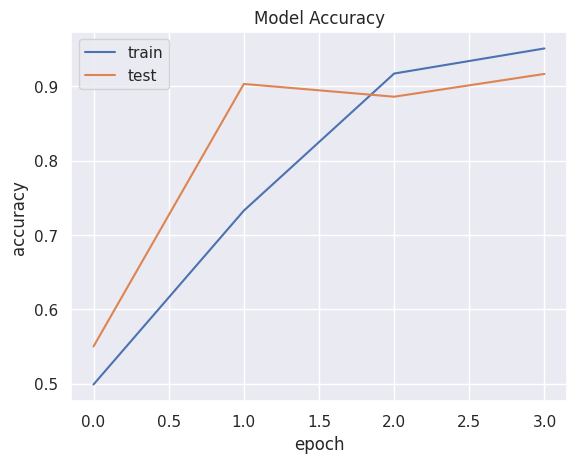

In [ ]:
# plot of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

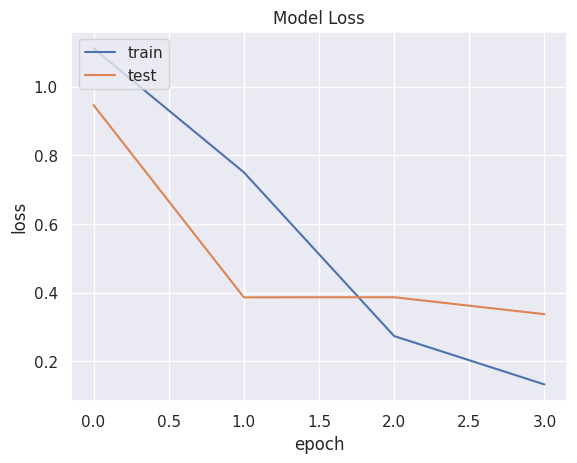

In [ ]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()